In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
#import dataset
tweets=pd.read_csv(r"D:\Excelr Assignment\Data Scientist\11-Text Mining\Elon_musk.csv",encoding='Latin-1')
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)
tweets

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
# Text Processing
tweets=[Text.strip() for Text in tweets.Text] 
tweets=[Text for Text in tweets if Text] # Removing empty strings
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [4]:
tweets_text=''.join(tweets)
tweets_text

'@kunalb11 I\x92m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?@joerogan @Spotify Great interview!@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox! https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine It\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+0001F923><U+0001F923>This is 

In [5]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens=tknzr.tokenize(tweets_text)
print(tweets_tokens)

['I', '\x92', 'm', 'an', 'alien', '@ID_AA_Carmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', '@gtera27', 'Doge', 'is', 'underestimated', '@teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2ojFrodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM@OwenSparks_', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation.The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', '@GiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'to', 'do', 'Clubhouse', 'with', ':/', '/', 't.co/3rWE9uHSTS@geoffkeighley', 'It', '\x92', 's', 'getting', 'realBo

In [6]:
tweets_tokens_text=' '.join(tweets_tokens)
tweets_tokens_text

'I \x92 m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2ojFrodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM@OwenSparks_ Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely @GiveDirectly Just sent someJust agree to do Clubhouse with :/ / t.co/3rWE9uHSTS@geoffkeighley It \x92 s getting realBought some Dogecoin for lil X , so he can be a toddler hodler @JoshManMode He definitely has issues , but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O@freewalletorg Any crypto w

In [7]:
#Removing Punctuations 
no_punc_text=tweets_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I \x92 m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2ojFrodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrMOwenSparks Haha thanks  Indeed  Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likely GiveDirectly Just sent someJust agree to do Clubhouse with   tco3rWE9uHSTSgeoffkeighley It \x92 s getting realBought some Dogecoin for lil X  so he can be a toddler hodler JoshManMode He definitely has issues  but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7Ofreewalletorg Any crypto wallet that won \x92 t give you your private keys should be

In [8]:
import re
no_url_text=re.sub(r'http\S+', '',no_punc_text)
no_url_text

'I \x92 m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likely GiveDirectly Just sent someJust agree to do Clubhouse with   tco3rWE9uHSTSgeoffkeighley It \x92 s getting realBought some Dogecoin for lil X  so he can be a toddler hodler JoshManMode He definitely has issues  but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs freewalletorg Your app sucksRT  NASA has selected Falcon Hea

In [23]:
import nltk
nltk.set_proxy('http://your_proxy_server.com:ranji')  # Set your proxy if needed
nltk.download('punkt', download_dir='path_to_download_directory', quiet=True, halt_on_error=False, raise_on_error=False)


# from nltk.tokenize import word_tokenize
# text_tokens=word_tokenize(no_url_text)
# print(text_tokens)

InvalidURL: nonnumeric port: 'ranji'

In [ ]:
len(text_tokens)

In [11]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocationThe', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'Clubhouse', 'tco3rWE9uHSTSgeoffkeighley', 'It', 'getting', 'realBought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'Thanks', 'fixing', 'freewalletorg', 'Please', 'unlock', 'account', 'AstroJordy', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'freewalletorg', 'Your', 'app', 'sucksRT', 'NASA', 'sel

In [12]:
#Normalize the data

lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['elements', 'lunar', 'gateway', 'together', 'one', 'mission', 'blkmdl3', 'once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', 'rationaletienne', 'starlink', 'staggeringly', 'difficult', 'technical', 'economic', 'endeavor', 'however', 'spacex', 'needs', 'pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequestered', 'net', 'value', 'product', 'made', 'must', 'scalable', 'g', 'it', 'meant', 'price', 'countries', 'only', 'difference', 'taxes', 'shipping', 'this', 'intended', 'earth', 'may', 'ideas', 'apply', 'mars', 'cryptoshrikar', 'xprize', 'team', 'manage', '100m', 'carbon', 'capture', 'prize', 'everyone', 'tesla', 'receives', 'stock', 'my', 'comp', 'stock', 'options', 'take', 'table', 'that', 'missingback', 'work', 'go', 'capybarasurfer', 'does', 'seem', 'bit', 'high', 'itsallrisky', 'doge', 'appears', 'inflationary', 'meaningfully', 'fixed', 'coins', 'per', 'unit', 'time', 'whereas', 'wow']


In [13]:
# Stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['element', 'lunar', 'gateway', 'togeth', 'one', 'mission', 'blkmdl3', 'onc', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'rationaletienn', 'starlink', 'staggeringli', 'difficult', 'technic', 'econom', 'endeavor', 'howev', 'spacex', 'need', 'pass', 'deep', 'chasm', 'neg', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequest', 'net', 'valu', 'product', 'made', 'must', 'scalabl', 'g', 'it', 'meant', 'price', 'countri', 'onli', 'differ', 'tax', 'ship', 'thi', 'intend', 'earth', 'may', 'idea', 'appli', 'mar', 'cryptoshrikar', 'xprize', 'team', 'manag', '100m', 'carbon', 'captur', 'prize', 'everyon', 'tesla', 'receiv', 'stock', 'my', 'comp', 'stock', 'option', 'take', 'tabl', 'that', 'missingback', 'work', 'go', 'capybarasurf', 'doe', 'seem', 'bit', 'high', 'itsallriski', 'doge', 'appear', 'inflationari', 'meaning', 'fix', 'coin', 'per', 'unit', 'time', 'wherea', 'wow']


In [14]:
# Lemmatization 
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

alien idaacarmack ray tracing cyberpunk hdr nextlevel have tried great interview gtera27 doge underestimated teslacn congratulations tesla china amazing execution last year now next even happy new year ox underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocationthe entertaining outcome likely givedirectly just sent somejust agree clubhouse tco3rwe9uhstsgeoffkeighley it getting realbought dogecoin lil x toddler hodler joshmanmode he definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy this true power any crypto wallet give private keys avoided costs freewalletorg your app sucksrt nasa selected falcon heavy launch first two elements lunar gateway together one mission blkmdl3 once predict cash flow reasonably well starlink ipo rationaletienne starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lo

In [15]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'gtera27', 'doge', 'underestimate', 'teslacn', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocationthe', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'send', 'somejust', 'agree', 'clubhouse', 'tco3rwe9uhstsgeoffkeighley', 'it', 'getting', 'realbought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'key', 'avoid', 'cost', 'freewalletorg', 'your', 'app', 'sucksrt', 'nasa', 'select', 'falcon', 'h

In [16]:
clean_tweets=' '.join(lemmas)
clean_tweets

'alien idaacarmack ray trace cyberpunk hdr nextlevel have try great interview gtera27 doge underestimate teslacn congratulation tesla china amazing execution last year now next even happy new year ox underdoge all thought would fail himself haha thank indeed tweet definitely represent realworld time allocationthe entertaining outcome likely givedirectly just send somejust agree clubhouse tco3rwe9uhstsgeoffkeighley it getting realbought dogecoin lil x toddler hodler joshmanmode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account astrojordy this true power any crypto wallet give private key avoid cost freewalletorg your app sucksrt nasa select falcon heavy launch first two element lunar gateway together one mission blkmdl3 once predict cash flow reasonably well starlink ipo rationaletienne starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon

In [17]:
# Feature Extration 
# 1 Using Count Vectorizer

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)

In [19]:
print(cv.vocabulary_)

{'alien': 219, 'idaacarmack': 1643, 'ray': 2682, 'trace': 3489, 'cyberpunk': 866, 'hdr': 1537, 'nextlevel': 2256, 'have': 1531, 'try': 3529, 'great': 1468, 'interview': 1754, 'gtera27': 1484, 'doge': 1009, 'underestimate': 3665, 'teslacn': 3356, 'congratulation': 768, 'tesla': 3354, 'china': 666, 'amazing': 242, 'execution': 1198, 'last': 1885, 'year': 3915, 'now': 2292, 'next': 2255, 'even': 1170, 'happy': 1516, 'new': 2253, 'ox': 2406, 'underdoge': 3664, 'all': 222, 'thought': 3419, 'would': 3899, 'fail': 1232, 'himself': 1580, 'haha': 1496, 'thank': 3381, 'indeed': 1691, 'tweet': 3544, 'definitely': 916, 'represent': 2758, 'realworld': 2703, 'time': 3437, 'allocationthe': 225, 'entertaining': 1135, 'outcome': 2382, 'likely': 1940, 'givedirectly': 1438, 'just': 1823, 'send': 2924, 'somejust': 3072, 'agree': 196, 'clubhouse': 700, 'tco3rwe9uhstsgeoffkeighley': 3312, 'it': 1775, 'getting': 1423, 'realbought': 2695, 'dogecoin': 1012, 'lil': 1944, 'toddler': 3453, 'hodler': 1589, 'joshma

In [20]:
print(cv.get_feature_names()[100:200])

['50000', '50k', '60', '60000', '65', '69420', '6f', '6ki', '727', '74', '78', '7th', '90', '9007', '91demigod', '922', '948', '95', '99', 'aber', 'able', 'abo', 'aboard', 'abort', 'about', 'above', 'absence', 'absolute', 'absolutely', 'absolutelyhey', 'absolutelywhat', 'absorb', 'absorption', 'absurd', 'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'acceleratingrt', 'acceleration', 'accelerator', 'accept', 'acceptable', 'access', 'accessible', 'accident', 'accidental', 'accommodate', 'account', 'accura', 'accuracy', 'accurate', 'ace', 'achieve', 'achievement', 'achy', 'across', 'action', 'active', 'activity', 'actual', 'actuall', 'actually', 'actuary', 'adagio', 'adamhoov', 'adamkiotz', 'adamklotz', 'add', 'additive', 'address', 'adlanbogatyryov', 'administer', 'adolfomoreno', 'adult', 'advanc', 'advance', 'advanced', 'advantage', 'adventure', 'advertise', 'advice', 'advise', 'aero', 'afb', 'affair', 'affect', 'affordable', 'africa', 'after', 'afternoon', 'age', 'ago

/Users/ravatez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [22]:
print(tweetscv.toarray().shape)

(11954, 3950)


In [23]:
# 2 CountVectorizer with N-Grams(Bigrams & Trigrams)

In [24]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [25]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'also', 'back', 'big', 'booster', 'car', 'come', 'complete', 'cool', 'could', 'crew', 'day', 'design', 'do', 'dragon', 'earth', 'engine', 'erdayastronaut', 'even', 'ever', 'exactly', 'falcon', 'first', 'flcnhvy', 'flight', 'fsd', 'future', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'it', 'land', 'launch', 'like', 'look', 'lot', 'love', 'make', 'many', 'maybe', 'mission', 'model', 'much', 'need', 'new', 'next', 'no', 'not', 'one', 'part', 'people', 'point', 'ppathole', 'pretty', 'probably', 'production', 'right', 'rocket', 'say', 'seem', 'soon', 'space', 'spacex', 'starlink', 'starship', 'start', 'still', 'super', 'sure', 'take', 'tesla', 'teslaownerssv', 'teslarati', 'test', 'thank', 'that', 'the', 'there', 'they', 'think', 'this', 'time', 'true', 'try', 'ufe0f', 'use', 'way', 'we', 'week', 'well', 'will', 'work', 'would', 'yeah', 'year', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]

In [26]:
# 3 TF-IDF Vectorizer

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfudf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [28]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfudf_matrix_ngram.toarray())

['10', '100', '13', '20', '2020', '30', '40', '4d', '60', 'able', 'absolutely', 'access', 'accurate', 'actually', 'add', 'after', 'ago', 'agree', 'ai', 'aim', 'air', 'all', 'almost', 'already', 'also', 'although', 'always', 'amazing', 'and', 'another', 'appear', 'apply', 'appreciate', 'approval', 'arm', 'around', 'article', 'astronaut', 'at', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'become', 'berlin', 'beta', 'big', 'bit', 'boca', 'body', 'booster', 'brain', 'bring', 'build', 'but', 'call', 'camera', 'can', 'car', 'cargo', 'cell', 'change', 'china', 'civilization', 'cleantechnica', 'close', 'cold', 'color', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'cov', 'create', 'crew', 'critical', 'curevac', 'datum', 'day', 'deep', 'definitely', 'delivery', 'design', 'difference', 'different', 'dmcryan', 'do', 'dock', 'dojo', 'dragon', 'drive', 'droneship', 'due', 'early', 'earth', 'easy', 'el

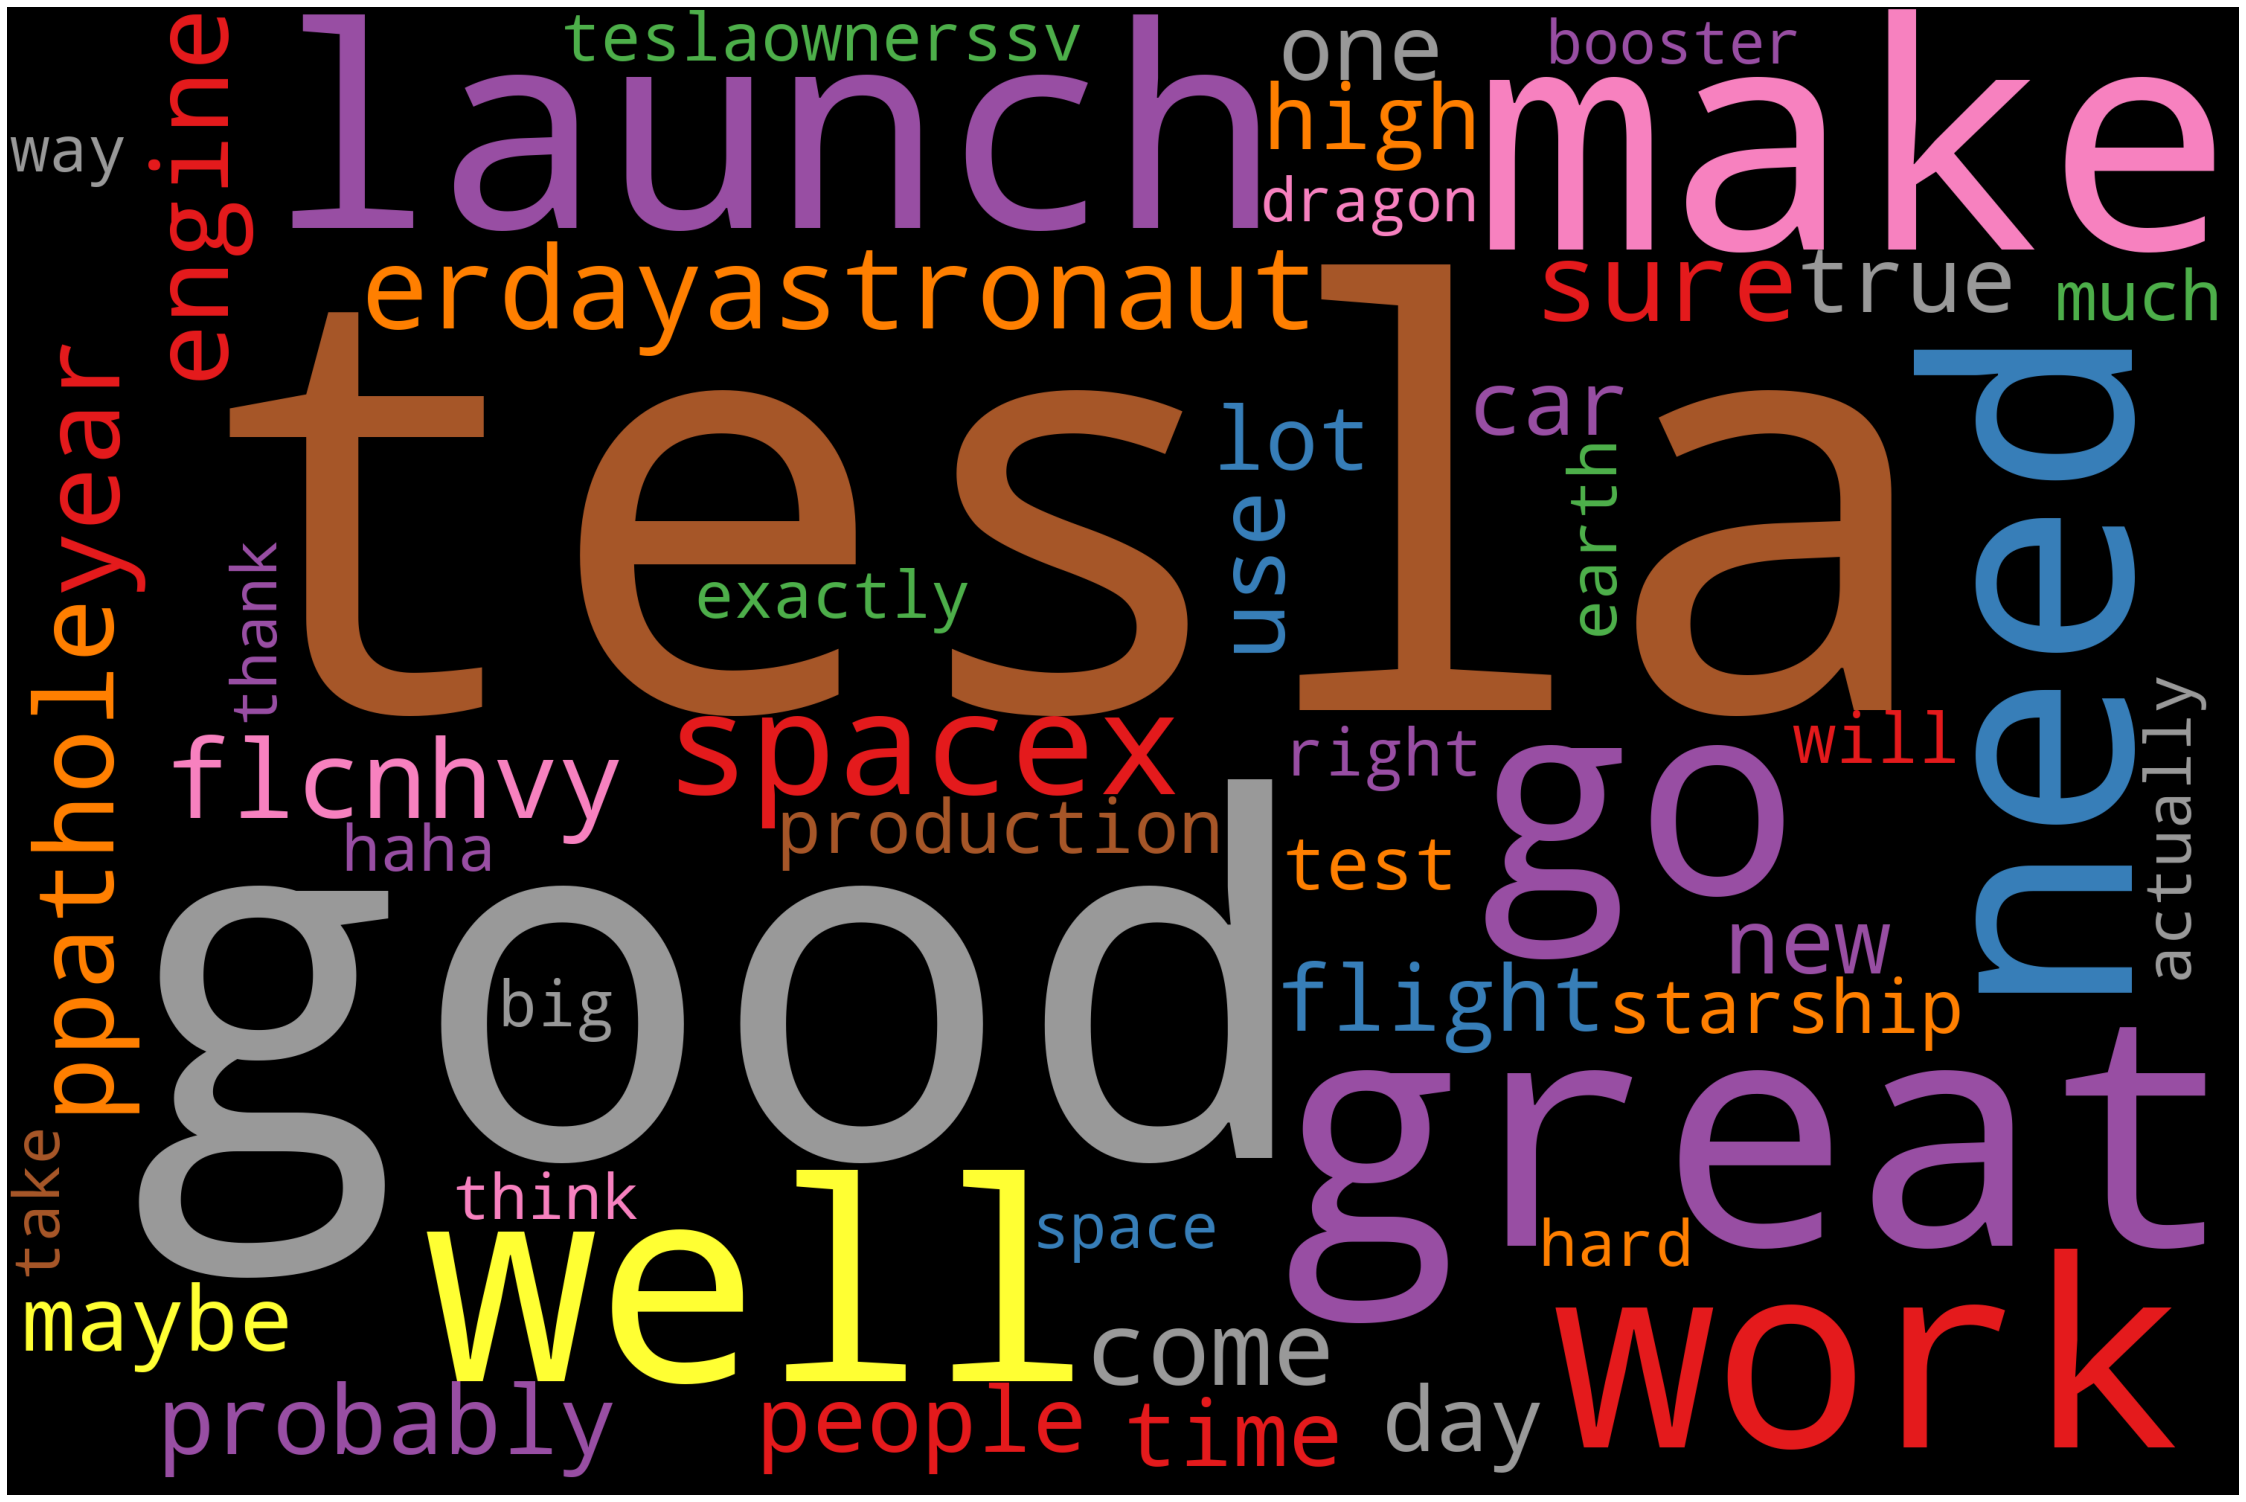

In [29]:
# Generating Word Cloud

def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

In [30]:
# Named Entity Ecognitiion
# POS tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [31]:
for token in doc_block[100:200]:
    print(token,token.pos_)

element NOUN
lunar ADJ
gateway NOUN
together ADV
one NUM
mission NOUN
blkmdl3 NOUN
once ADV
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink VERB
ipo ADJ
rationaletienne NOUN
starlink NOUN
staggeringly ADV
difficult ADJ
technical ADJ
economic ADJ
endeavor NOUN
however ADV
spacex AUX
need AUX
pass VERB
deep ADJ
chasm NOUN
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
value NOUN
product NOUN
make VERB
must AUX
scalable VERB
g PROPN
it PRON
mean VERB
price NOUN
country NOUN
only ADV
difference NOUN
taxis NOUN
ship NOUN
this PRON
intend VERB
earth NOUN
may AUX
idea VERB
apply VERB
mars PROPN
cryptoshrikar PROPN
xprize NOUN
team NOUN
manage VERB
100 NUM
m PROPN
carbon NOUN
capture NOUN
prize NOUN
everyone PRON
tesla NOUN
receive VERB
stock NOUN
my PRON
comp NOUN
stock NOUN
option NOUN
take VERB
table NOUN
that SCONJ
missingback NOUN
work NOUN
go VERB
capybarasurfer NOUN
do AUX
seem VERB
bit NOUN
hig

In [32]:
nouns_verb=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verb[100:200])

['appear', 'fix', 'coin', 'unit', 'time', 'erdayastronaut', 'launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'improve', 'ship', 'booster', 'mass', 'michaelhodapp', 'work', 'tonight', 'ðogecoin', 'video', 'people', 'speak', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'u0001f3b6', 'let', 'rainforest', 'come', 'simplicity', 'genius', 'astrogdogg', 'dogecoinrich', 'decade', 'work', 'look', 'note', 'email', 'text', 'yeslesson', 'learnedof', 'earth', 'marstime', 'tell', 'story', 'tesla', 'theonion', 'read', 'kingdom', 'haven', 'hear', 'name', 'year', 'grimezsz', 'dogecakeyolt', 'kristennetten', 'owenspark', 'thing', 'restaurant', 'hang', 'currency', 'earth', 'redlineshifter', 'destiny', 'erdayastronaut', 'say', 'ship', 'landing', 'burn', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'erdayastronaut', 'seem', 'turbopumpfe', 'raptor', 'launch', 'mission', 'collect', 'galaxy', 'explore', 'falcon', 'launch', 'starlink', 'satellite', 'orbit', 'de

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(nouns_verb)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10]

,word,count
0,tesla,89
1,make,64
2,launch,53
3,year,47
4,go,47
5,need,44
6,work,43
7,come,39
8,get,38
9,engine,35


<AxesSubplot:title={'center':'Top 10 Nouns & Verbs'}, xlabel='word'>

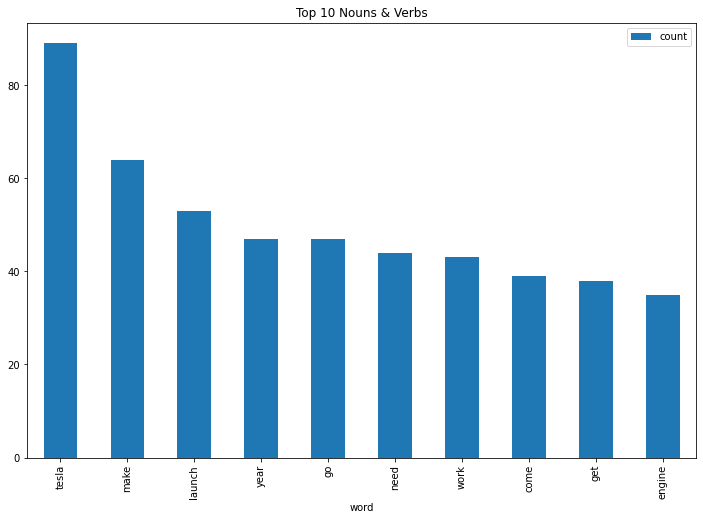

In [34]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 Nouns & Verbs')

In [35]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(tweets))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [36]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [37]:
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [38]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [39]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score


In [40]:
calculate_sentiment(text='great')

3

In [41]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
919    0
920   -4
921    0
922   -2
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [42]:
# count how many words are there in a sentence
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [43]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
837,Cool Model 3 review by @iamjamiefoxx https://t...,-8,61
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
920,"It may never pay out, as the stock cant b ht...",-4,31
611,"Then static fire, checkouts, static fire, fly ...",-4,12
...,...,...,...
645,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94


In [44]:
#Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.312771
std        2.647718
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [45]:
# Negative Sentiment Score
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [46]:
# positive Sentiment Score
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,3,109
17,Back to work I go @CapybaraSurfer @MattWallace...,4,38
...,...,...,...
911,He was one of the very best.,3,7
913,"@Ali_Afshari In general, we need to improve ho...",4,87
915,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",7,15
917,This is both great &amp; terrifying.,3,6


In [47]:
# Adding index
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-4,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,922


/Users/ravatez/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

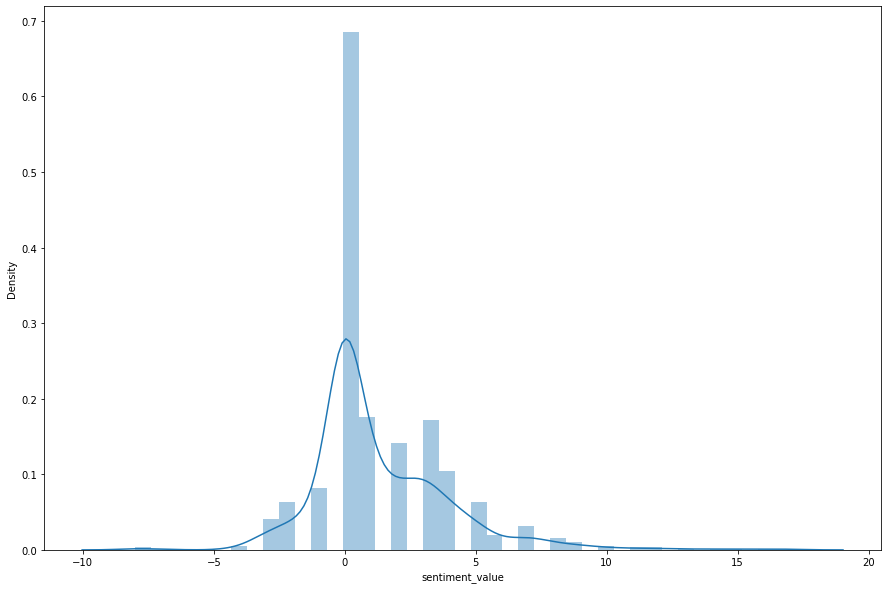

In [48]:
# Plotting TRhe sentiment value for whole review

import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

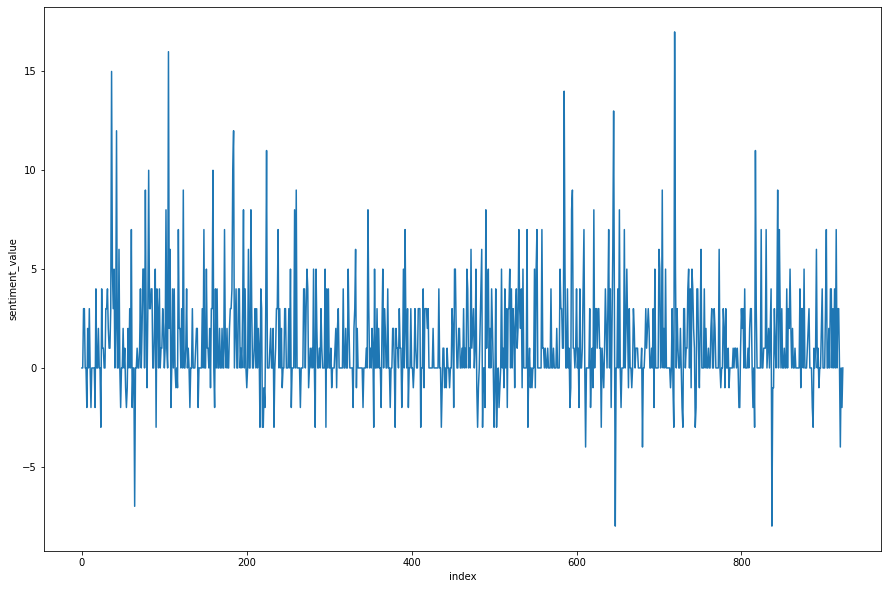

In [49]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

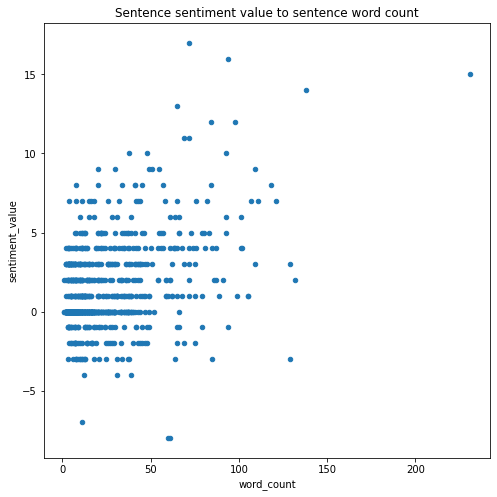

In [50]:
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')